In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../data/Leases.csv')
company_names = df["company_name"].unique().tolist()

file_path = 'company_names.txt'
with open(file_path, 'w') as file:
    file.write(','.join(map(str, company_names)))

In [4]:
dallas = df[df['market'] == "Dallas/Ft Worth"].reset_index()

In [5]:
dallas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15272 entries, 0 to 15271
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           15272 non-null  int64  
 1   year                            15272 non-null  int64  
 2   quarter                         15272 non-null  object 
 3   monthsigned                     15261 non-null  float64
 4   market                          15272 non-null  object 
 5   building_name                   13199 non-null  object 
 6   building_id                     15272 non-null  object 
 7   address                         15272 non-null  object 
 8   region                          15272 non-null  object 
 9   city                            15272 non-null  object 
 10  state                           15272 non-null  object 
 11  zip                             15272 non-null  float64
 12  internal_submarket              

In [6]:
dallas = dallas.iloc[:,1:20]

In [7]:
dallas["full_address"] = dallas["address"] + ", " + dallas["city"] + ", " + dallas["state"] + " " + dallas["zip"].astype(int).astype(str)

In [8]:
dallas.head()

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,zip,internal_submarket,internal_class,leasedSF,company_name,internal_industry,transaction_type,internal_market_cluster,costarID,full_address
0,2018,Q1,1.0,Dallas/Ft Worth,10000 NCX,Dallas/Ft Worth_Central Expressway_Dallas_1000...,10000 N Central Expy,South,Dallas,TX,75231.0,Central Expressway,A,3923.0,NaN,NaN,New,NaN,410032,"10000 N Central Expy, Dallas, TX 75231"
1,2018,Q1,1.0,Dallas/Ft Worth,1100 East Campbell,Dallas/Ft Worth_Richardson Telecom Corridor_Ri...,1100 E Campbell Rd,South,Richardson,TX,75081.0,Richardson Telecom Corridor,O,1216.0,NaN,NaN,New,NaN,414337,"1100 E Campbell Rd, Richardson, TX 75081"
2,2018,Q1,1.0,Dallas/Ft Worth,1111 Tower,Dallas/Ft Worth_Stemmons_Dallas_1111 Tower_111...,1111 W Mockingbird Ln,South,Dallas,TX,75247.0,Stemmons,O,830.0,NaN,NaN,New,NaN,409416,"1111 W Mockingbird Ln, Dallas, TX 75247"
3,2018,Q1,1.0,Dallas/Ft Worth,1111 Tower,Dallas/Ft Worth_Stemmons_Dallas_1111 Tower_111...,1111 W Mockingbird Ln,South,Dallas,TX,75247.0,Stemmons,O,1193.0,NaN,NaN,New,NaN,409416,"1111 W Mockingbird Ln, Dallas, TX 75247"
4,2018,Q1,1.0,Dallas/Ft Worth,1111 Tower,Dallas/Ft Worth_Stemmons_Dallas_1111 Tower_111...,1111 W Mockingbird Ln,South,Dallas,TX,75247.0,Stemmons,O,1870.0,NaN,NaN,New,NaN,409416,"1111 W Mockingbird Ln, Dallas, TX 75247"


In [16]:
dallas_2024 = dallas[dallas["year"] == 2024]
dallas_2024_class_A = dallas_2024[dallas_2024["internal_class"] == "A"]
dallas_2024_class_A.head()
# address, city, state, zip



,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,internal_submarket,internal_class,leasedSF,company_name,internal_industry,transaction_type,internal_market_cluster,costarID,full_address,yr_qtr
3103,2024,Q1,1.0,Dallas/Ft Worth,2100 McKinney,Dallas/Ft Worth_Uptown_Dallas_2100 McKinney_21...,2100 McKinney Ave,South,Dallas,TX,...,Uptown,A,16229.0,NaN,NaN,New,NaN,420460,"2100 McKinney Ave, Dallas, TX 75201",2024-01-01
3106,2024,Q1,1.0,Dallas/Ft Worth,4851 LBJ,Dallas/Ft Worth_LBJ_Dallas_4851 LBJ_4851 Lyndo...,4851 Lyndon B Johnson Fwy,South,Dallas,TX,...,LBJ,A,2339.0,NaN,NaN,New,NaN,410026,"4851 Lyndon B Johnson Fwy, Dallas, TX 75244",2024-01-01
3107,2024,Q1,1.0,Dallas/Ft Worth,5000 Legacy,Dallas/Ft Worth_North Dallas Corridor_Plano_50...,5000 Legacy Dr,South,Plano,TX,...,North Dallas Corridor,A,1901.0,NaN,NaN,New,NaN,526518,"5000 Legacy Dr, Plano, TX 75024",2024-01-01
3108,2024,Q1,1.0,Dallas/Ft Worth,777 Main,Dallas/Ft Worth_Fort Worth CBD_Fort Worth_777 ...,777 Main St,South,Fort Worth,TX,...,Fort Worth CBD,A,3453.0,NaN,NaN,New,NaN,422543,"777 Main St, Fort Worth, TX 76102",2024-01-01
3110,2024,Q1,1.0,Dallas/Ft Worth,Addison Circle One,Dallas/Ft Worth_North Dallas Corridor_Addison_...,15601 Dallas Pky,South,Addison,TX,...,North Dallas Corridor,A,13168.0,SAKO,NaN,New,NaN,420407,"15601 Dallas Pky, Addison, TX 75001",2024-01-01


<Axes: xlabel='yr_qtr'>

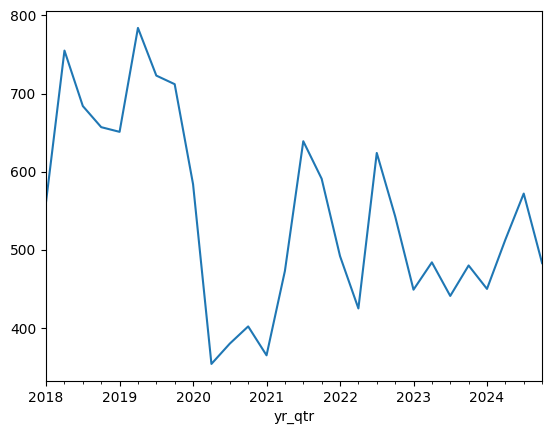

In [11]:
dallas.groupby("yr_qtr").count()["year"].plot()

### Geospacial

In [12]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="dallas_mapper")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)  # Be nice to the server!

dallas_2024_class_A = dallas_2024_class_A.head(20)
# Apply geocoding
dallas_2024_class_A['location'] = dallas_2024_class_A['full_address'].apply(geocode)
dallas_2024_class_A['latitude'] = dallas_2024_class_A['location'].apply(lambda loc: loc.latitude if loc else None)
dallas_2024_class_A['longitude'] = dallas_2024_class_A['location'].apply(lambda loc: loc.longitude if loc else None)


KeyboardInterrupt: 

In [ ]:
prices = pd.read_csv('../../data/Price and Availability Data.csv')

In [15]:
prices.head()

,year,quarter,market,internal_class,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,Atlanta,A,101140416,20239067,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126
1,2018,Q1,Atlanta,O,65810449,12728989,0.193419,18.560886,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742
2,2018,Q1,Austin,A,36815073,4281986,0.116311,40.384706,36.596618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1738905
3,2018,Q1,Austin,O,27947525,3360936,0.121082,30.118658,36.596618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185674
4,2018,Q1,Baltimore,A,41033288,6813380,0.166045,27.104835,22.954034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380750


In [ ]:
df["market"].unique()
df[df["market"] == "Raleigh/Durham"]

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
2113,2018,Q1,1.0,Raleigh/Durham,Arena Centre,Raleigh/Durham_West Raleigh_Raleigh_Arena Cent...,1511 Sunday Dr,South,Raleigh,NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2114,2018,Q1,1.0,Raleigh/Durham,Center for Technology Innovation,Raleigh/Durham_West Raleigh_Raleigh_Center for...,1010 Main Campus Dr,South,Raleigh,NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2115,2018,Q1,1.0,Raleigh/Durham,Center for Technology Innovation,Raleigh/Durham_West Raleigh_Raleigh_Center for...,1010 Main Campus Dr,South,Raleigh,NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2116,2018,Q1,1.0,Raleigh/Durham,Charter Square,Raleigh/Durham_Downtown Raleigh_Raleigh_Charte...,555 Fayetteville St,South,Raleigh,NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2117,2018,Q1,1.0,Raleigh/Durham,Concourse Lakeside II,Raleigh/Durham_RTP/RDU_Morrisville_Concourse L...,2803 Slater Rd,South,Morrisville,NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194625,2024,Q4,12.0,Raleigh/Durham,Danbury Hall,Raleigh/Durham_RTP/RDU_Durham_Danbury Hall_541...,5411 Page Rd,South,Durham,NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194626,2024,Q4,12.0,Raleigh/Durham,GlenLake Three,Raleigh/Durham_Glenwood/Creedmoor_Raleigh_Glen...,4300 Edwards Mill Rd,South,Raleigh,NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194627,2024,Q4,12.0,Raleigh/Durham,Newcastle at 1015,Raleigh/Durham_RTP/RDU_Durham_Newcastle at 101...,1015 Swabia Ct,South,Durham,NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194628,2024,Q4,12.0,Raleigh/Durham,The Dillon Office,Raleigh/Durham_Downtown Raleigh_Raleigh_The Di...,223 S West St,South,Raleigh,NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df[df["market"] == "Dallas/Ft Worth"]

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
565,2018,Q1,1.0,Dallas/Ft Worth,10000 NCX,Dallas/Ft Worth_Central Expressway_Dallas_1000...,10000 N Central Expy,South,Dallas,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566,2018,Q1,1.0,Dallas/Ft Worth,1100 East Campbell,Dallas/Ft Worth_Richardson Telecom Corridor_Ri...,1100 E Campbell Rd,South,Richardson,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,2018,Q1,1.0,Dallas/Ft Worth,1111 Tower,Dallas/Ft Worth_Stemmons_Dallas_1111 Tower_111...,1111 W Mockingbird Ln,South,Dallas,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
568,2018,Q1,1.0,Dallas/Ft Worth,1111 Tower,Dallas/Ft Worth_Stemmons_Dallas_1111 Tower_111...,1111 W Mockingbird Ln,South,Dallas,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,2018,Q1,1.0,Dallas/Ft Worth,1111 Tower,Dallas/Ft Worth_Stemmons_Dallas_1111 Tower_111...,1111 W Mockingbird Ln,South,Dallas,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194485,2024,Q4,12.0,Dallas/Ft Worth,CoreLogic HQ,Dallas/Ft Worth_West LBJ_Coppell_CoreLogic HQ_...,3001 Hackberry Rd,South,Coppell,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194486,2024,Q4,12.0,Dallas/Ft Worth,International Business Park,Dallas/Ft Worth_North Dallas Corridor_Plano_In...,6275 W Plano Pky,South,Plano,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194487,2024,Q4,12.0,Dallas/Ft Worth,Two Lincoln Centre,Dallas/Ft Worth_LBJ_Dallas_Two Lincoln Centre_...,5420 Lyndon B Johnson Fwy,South,Dallas,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194488,2024,Q4,12.0,Dallas/Ft Worth,NaN,Dallas/Ft Worth_Richardson Telecom Corridor_Ri...,2221 Lakeside Blvd,South,Richardson,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
